In [1]:
from utils.results import *
import torch
import matplotlib.pyplot as plt
import json

In [2]:
# settings for the plots,
dataset= 'beantec'
run= "contamination_0"  
experiment=  "Exp_18_06_24-"#,"Exp0-r18",
#category= "juice_bottle"

RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  


with open('/home/bule/projects/UTRAD/configurations/beantec.json', 'r') as file:
    conf_beantec = json.load(file)
print(list(conf_beantec['anomaly_categories'].keys()))

['01', '02', '03']


['01', '02', '03']
['01', '02', '03']
01
02
03


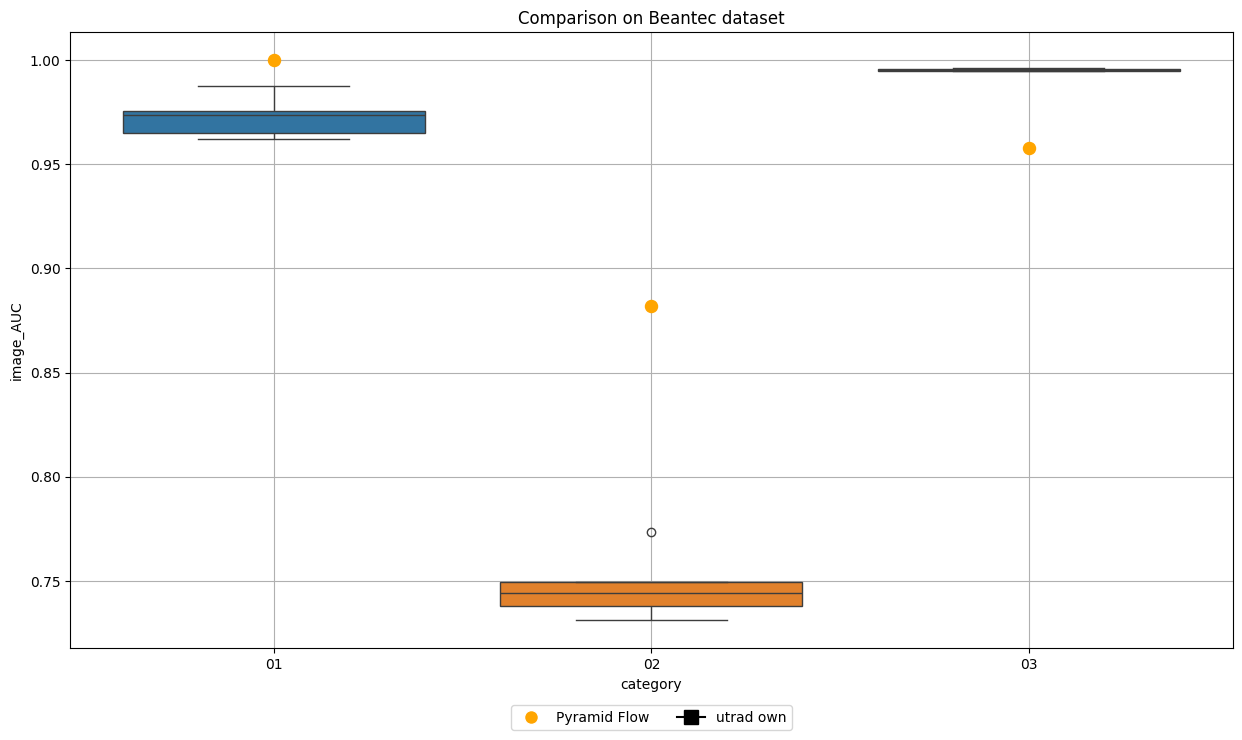

In [3]:
exp_name= "Exp_18_06_24"
category= "01"
root= '/home/bule/projects/UTRAD/results/beantec/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/beantec.json', 'r') as file:
    conf_beantec = json.load(file)
print(list(conf_beantec['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

category_list= list(conf_beantec['anomaly_categories'].keys())

print(category_list)
#category_list= ['01', '02']
run_range= np.arange(1,6)

res_df=[]
for category in category_list:
    print(category)
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df.append(lastrow_df)
    
res_df= pd.concat(res_df)



auc_Pyramid = {'01': [1],'02': [0.882],'03': [0.958]}

# PyramidFlow: High-Resolution Defect Contrastive Localization
# using Pyramid Normalizing Flow

plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="category", y="image_AUC", hue="category", data=res_df)
for category, auc in auc_Pyramid.items():
    ax.scatter(x=[category], y=auc, color='orange', s=75, zorder=5)


# Add custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Pyramid Flow', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='s', color='black', label='utrad own', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.081), ncol=3)
plt.title('Comparison on Beantec dataset')
plt.grid(True)
plt.show()

In [4]:
dirs=[
'/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_1-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_1-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_1-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_2-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_2-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_2-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_2-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_4-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_4-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_4-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_4-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_5-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_5-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_5-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_5-splicing_connectors'
    
    
]


notlonglist=[]
for path in dirs:
    if len(read_training_scores(path+'/args.log')['Loss'])<150:
        notlonglist.append(path)
notlonglist

['/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/Exp_04_06_24_run_3-pushpins']

In [5]:
plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_17_02_24_baseline-")
plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_20_02_24-")

['01', '03', '02']


ValueError: Could not interpret value `Class` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

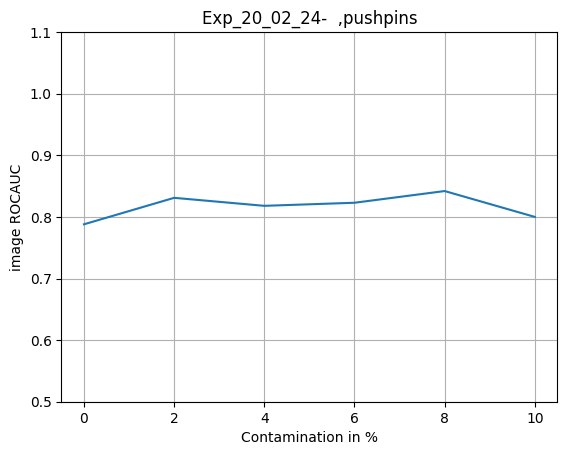

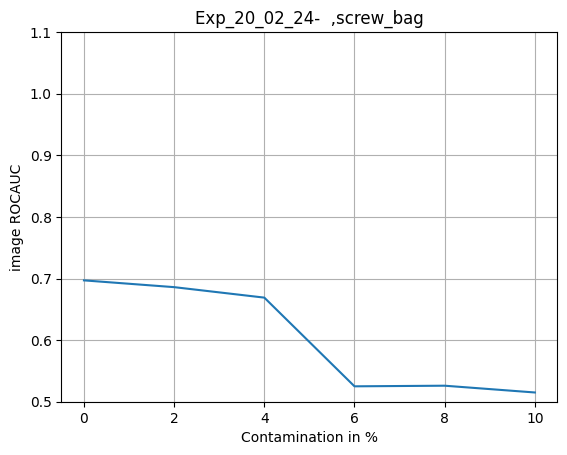

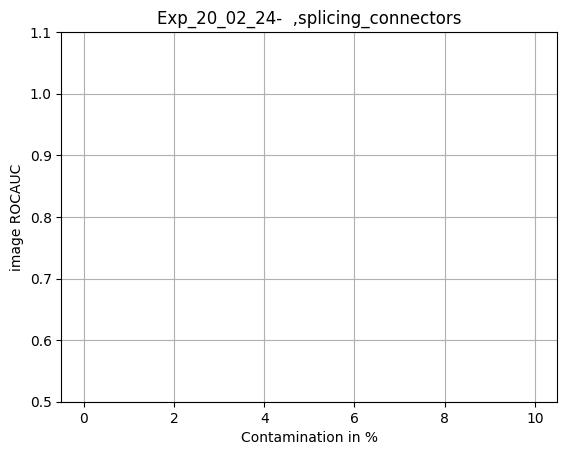

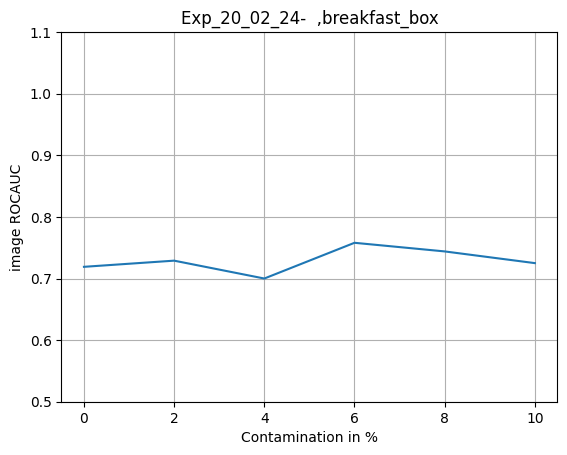

In [ ]:
#contam_dir_list=["contamination_0","contamination_2","contamination_4","contamination_6","contamination_8","contamination_10"]
#plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_20_02_24-",category="juice_bottle")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_20_02_24-",category="pushpins")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_20_02_24-",category="screw_bag")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_20_02_24-",category="splicing_connectors")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_20_02_24-",category="breakfast_box")


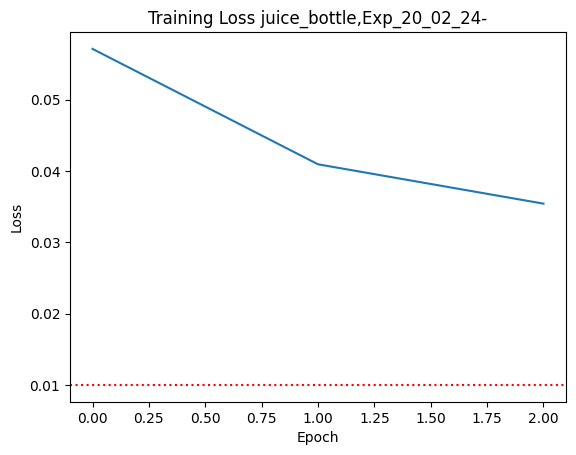

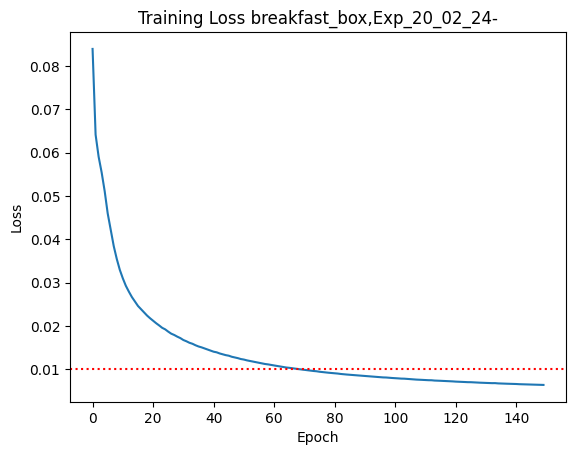

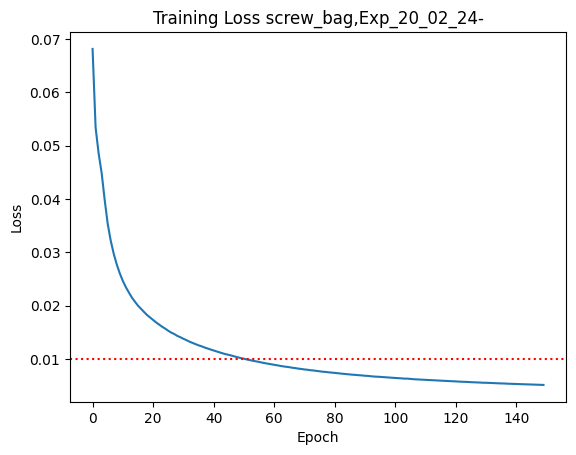

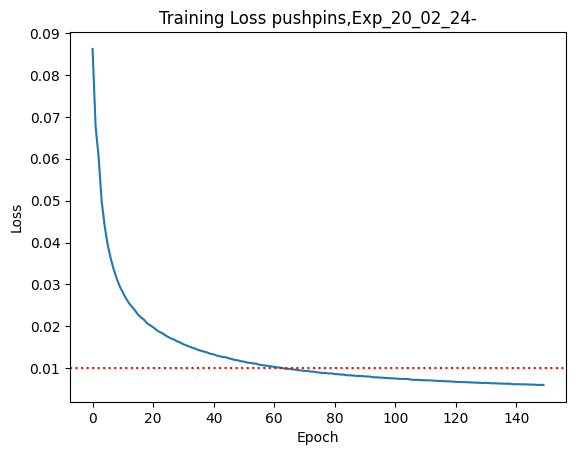

FileNotFoundError: [Errno 2] No such file or directory: 'results/mvtec_loco/contamination_0/Exp_20_02_24-splicing_connectors/args.log'

In [ ]:
plot_losses(RESPATH,dataset='mvtec_loco',run="contamination_0",experiment="Exp_20_02_24-")